[Lectures on Scientific Computing](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master)

[A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#data-visualization-and-plotting)



In [12]:
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


In [16]:
from sklearn.naive_bayes import GaussianNB
nb_cif = GaussianNB()
nb_clf = nb_cif.fit(features_train, labels_train)
nb_pred = nb_clf.predict(features_test)
nb_score = accuracy_score(labels_test, nb_pred)

In [17]:
nb_score

0.88400000000000001

In [5]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl


In [24]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")


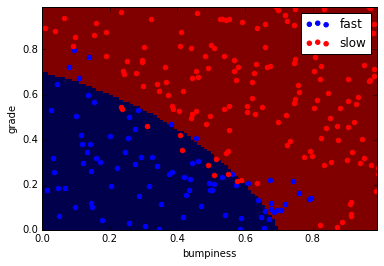

In [25]:
prettyPicture(nb_clf, features_test, labels_test)

In [28]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear")
svm_clf.fit(features_train, labels_train)
svm_pred = svm_clf.predict(features_test)
svm_acc = accuracy_score(svm_pred, labels_test)


In [29]:
svm_acc

0.92000000000000004

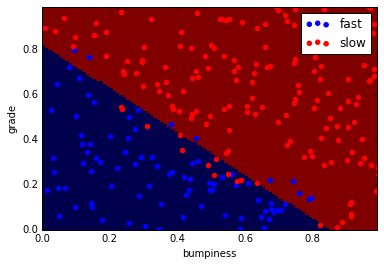

In [30]:
prettyPicture(svm_clf, features_test, labels_test)

In [31]:
from sklearn.svm import SVC
svm2_clf = SVC(kernel="rbf", C=1.0)
svm2_clf.fit(features_train, labels_train)
svm2_pred = svm2_clf.predict(features_test)
svm2_acc = accuracy_score(svm2_pred, labels_test)

In [32]:
svm2_acc

0.92000000000000004

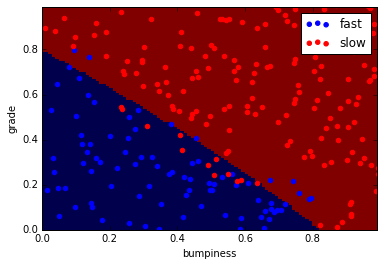

In [33]:
prettyPicture(svm2_clf, features_test, labels_test)

In [34]:
from sklearn.svm import SVC
svm3_clf = SVC(kernel="rbf", C=100)
svm3_clf.fit(features_train, labels_train)
svm3_pred = svm3_clf.predict(features_test)
svm3_acc = accuracy_score(svm3_pred, labels_test)

In [35]:
svm3_acc

0.91600000000000004

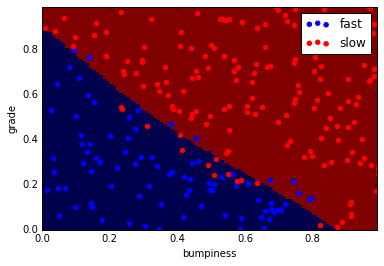

In [36]:
prettyPicture(svm3_clf, features_test, labels_test)

In [49]:
from sklearn.svm import SVC
svm4_clf = SVC(kernel="rbf", C=10000000)
svm4_clf.fit(features_train, labels_train)
svm4_pred = svm4_clf.predict(features_test)
svm4_acc = accuracy_score(svm4_pred, labels_test)

In [50]:
svm4_acc

0.94799999999999995

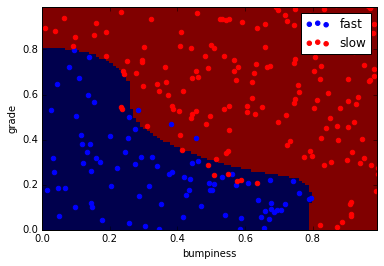

In [51]:
prettyPicture(svm4_clf, features_test, labels_test)